# Movie Industry Analysis  
Author: Jade Aidoghie  
Date: 6/2/23
  
## 1. Introduction  
In this notebook, I will be performing an in-depth exploration of a IMDb Movie dataset. The objective of this analysis is to gain insights about the film industry, specifically: What makes a movie successful?. This dataset provides an extensive overview on the different movie aspects such as IMDb scores, financial performance, and directors. This is a project I worked on while studying at WSU and the data was sourced from my professor.

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Inspection

Importing the movie dataset and storing it in a variable called `movies`.

In [126]:
movies = pd.DataFrame(pd.read_csv("./MovieData.csv"))

In [127]:
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [128]:
# (Rows, Columns)
movies.shape

(5043, 28)

In [129]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [130]:
movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


# 3. Cleaning the Data

Finding the number of Null values in all the columns and rows. Also, finding the percentage of Null values in each column. 

In [131]:
# Code for column-wise null count
TotNull = movies.isnull().sum()
TotNull

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [132]:
# row-wise null count
RowNull = movies.isnull().sum(axis=1)
RowNull

0        0
1        0
2        0
3        0
4       14
        ..
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64

In [133]:
# column-wise null percentages rounded to 2 decimal places
null_perc = ((movies.isnull().sum() / len(movies)) * 100).round(2)
null_perc

color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.42
language                      0.28
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

### Filling NaN values
The `language` column has some NaN values that will be replaced with `'English'`.

In [134]:
# Replacing null values with 'English'
movies['language'] = movies['language'].fillna('English') 

In [135]:
movies.language.isnull().sum() # Checking for nulls

0

### Dropping unecessary rows
Some of the rows have more than five null columns values. These rows won't be very useful so they will be removed.

In [136]:
# Storing original number of rows
rows_before_dropping = movies.shape[0]

# Dropping the rows that have > 5 NaN values
retained_movies = movies.dropna(thresh=(movies.shape[1] - 5)) 

### Checking the percentage of retained rows

In [137]:
# Checking the Percentage of retained rows
rows_after = retained_movies.shape[0]
frac_retained = (rows_after / rows_before_dropping) * 100
frac = round(frac_retained, 2)
print(f"Percentage of Retained Rows: {frac}%")

Percentage of Retained Rows: 98.55%


### Counting the number of duplicate data entries

In [138]:
# Number of duplicates
dups = len(movies)-len(movies.drop_duplicates())

print(f"There are {dups} duplicate entries.")

There are 45 duplicate entries.


In [139]:
# Dropping the dupicate entries
movies.drop_duplicates()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,English,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


## 4. Data Analysis

### Finding the movies with highest profit

Creating a new column called `profit` which is the difference of the two columns: `gross` and `budget`. Extracting the top ten profiting movies in descending order and storing them in a new dataframe called `top10`


In [140]:
# Creating the profit column
movies['profit'] = movies['gross'] - movies['budget']
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,English,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN


In [141]:
# Sorting the dataframe 
top_10 = movies.sort_values('profit', ascending=False).head(10)

In [142]:
# printing the top 10 movies data
columns_to_display = ['movie_title', 'director_name', 'duration', 'gross', 'genres', 'imdb_score', 'budget', 'content_rating', 'country', 'language','profit']
top_10[columns_to_display]

,movie_title,director_name,duration,gross,genres,imdb_score,budget,content_rating,country,language,profit
0,Avatar,James Cameron,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,7.9,237000000.0,PG-13,USA,English,523505847.0
29,Jurassic World,Colin Trevorrow,124.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,7.0,150000000.0,PG-13,USA,English,502177271.0
26,Titanic,James Cameron,194.0,658672302.0,Drama|Romance,7.7,200000000.0,PG-13,USA,English,458672302.0
3024,Star Wars: Episode IV - A New Hope,George Lucas,125.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,8.7,11000000.0,PG,USA,English,449935665.0
3080,E.T. the Extra-Terrestrial,Steven Spielberg,120.0,434949459.0,Family|Sci-Fi,7.9,10500000.0,PG,USA,English,424449459.0
794,The Avengers,Joss Whedon,173.0,623279547.0,Action|Adventure|Sci-Fi,8.1,220000000.0,PG-13,USA,English,403279547.0
17,The Avengers,Joss Whedon,173.0,623279547.0,Action|Adventure|Sci-Fi,8.1,220000000.0,PG-13,USA,English,403279547.0
509,The Lion King,Roger Allers,73.0,422783777.0,Adventure|Animation|Drama|Family|Musical,8.5,45000000.0,G,USA,English,377783777.0
240,Star Wars: Episode I - The Phantom Menace,George Lucas,136.0,474544677.0,Action|Adventure|Fantasy|Sci-Fi,6.5,115000000.0,PG,USA,English,359544677.0
66,The Dark Knight,Christopher Nolan,152.0,533316061.0,Action|Crime|Drama|Thriller,9.0,185000000.0,PG-13,USA,English,348316061.0


### Finding the IMDb Top 250 Movies

Creating a new dataframe `IMDb_Top_250` and storing the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Ensuring that for each of these movies, the `num_voted_users` is greater than 25,000. Also adding a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.

In [143]:
# Extracting the top 250 moviese
m = movies[movies['num_voted_users'] > 25000]

# Creating the new dataframe
IMDb_Top_250 = m.sort_values('imdb_score', ascending=False).head(250)

# Creating a rank column
IMDb_Top_250['Rank'] = range(1, 251)

In [144]:
# printing results
columns_to_display = ['movie_title', 'director_name', 'duration', 'gross', 'genres', 'imdb_score', 'budget', 'content_rating', 'country', 'language','profit', 'Rank']
IMDb_Top_250[columns_to_display]

,movie_title,director_name,duration,gross,genres,imdb_score,budget,content_rating,country,language,profit,Rank
1937,The Shawshank Redemption,Frank Darabont,142.0,28341469.0,Crime|Drama,9.3,25000000.0,R,USA,English,3341469.0,1
3466,The Godfather,Francis Ford Coppola,175.0,134821952.0,Crime|Drama,9.2,6000000.0,R,USA,English,128821952.0,2
3481,Fargo,NaN,53.0,NaN,Crime|Drama|Thriller,9.0,NaN,TV-MA,USA,English,NaN,3
66,The Dark Knight,Christopher Nolan,152.0,533316061.0,Action|Crime|Drama|Thriller,9.0,185000000.0,PG-13,USA,English,348316061.0,4
2837,The Godfather: Part II,Francis Ford Coppola,220.0,57300000.0,Crime|Drama,9.0,13000000.0,R,USA,English,44300000.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4266,Before Sunset,Richard Linklater,80.0,5792822.0,Drama|Romance,8.0,2700000.0,R,USA,English,3092822.0,246
602,Big Fish,Tim Burton,125.0,66257002.0,Adventure|Drama|Fantasy,8.0,70000000.0,PG-13,USA,English,-3742998.0,247
1603,Mystic River,Clint Eastwood,138.0,90135191.0,Crime|Drama|Mystery|Thriller,8.0,25000000.0,R,USA,English,65135191.0,248
4261,The Hustler,Robert Rossen,134.0,NaN,Drama|Sport,8.0,2000000.0,Unrated,USA,English,NaN,249


Extracting all the movies in the `IMDb_Top_250` dataframe which are not in the English language and storing them in a new dataframe named `Top_Foreign_Lang_Film`.

In [145]:
Top_Foreign_Lang_Film = IMDb_Top_250[IMDb_Top_250['language'] != 'English']

In [146]:
# printing the top 5 foreign language films
Top_Foreign_Lang_Film.head()['movie_title']

4498    The Good, the Bad and the Ugly 
4747                     Seven Samurai 
4029                       City of God 
2373                     Spirited Away 
3870                           Airlift 
Name: movie_title, dtype: object

### What is the movie with the longest duration?

In [147]:
# Finding maximum duration
max_duration = movies['duration'].max() 

# Finding the movie with the maximum duration
longest_movie = movies[movies['duration'] == max_duration]

# Displaying information about movie
columns_to_display = ['movie_title', 'director_name', 'duration', 'gross', 'genres', 'imdb_score', 'budget', 'content_rating', 'country', 'language']
longest_movies_filtered = longest_movie[columns_to_display]

longest_movies_filtered

,movie_title,director_name,duration,gross,genres,imdb_score,budget,content_rating,country,language
1710,Trapped,NaN,511.0,NaN,Crime|Drama|Thriller,8.2,NaN,NaN,Iceland,Icelandic


### What is the highest grossing movie?

In [148]:
# Finding maximum grossing movie
max_gross = movies['gross'].max() 

# Finding the highest grossing movie
gmovie = movies[movies['gross'] == max_gross]

# Displaying information about movie
gmovies_filtered = gmovie[columns_to_display]

gmovies_filtered

,movie_title,director_name,duration,gross,genres,imdb_score,budget,content_rating,country,language
0,Avatar,James Cameron,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,7.9,237000000.0,PG-13,USA,English


### How many directors are there in the dataset?

In [149]:
HowMany = movies.director_name.describe()
HowMany

count                 4939
unique                2398
top       Steven Spielberg
freq                    26
Name: director_name, dtype: object

## 5. Visualizations

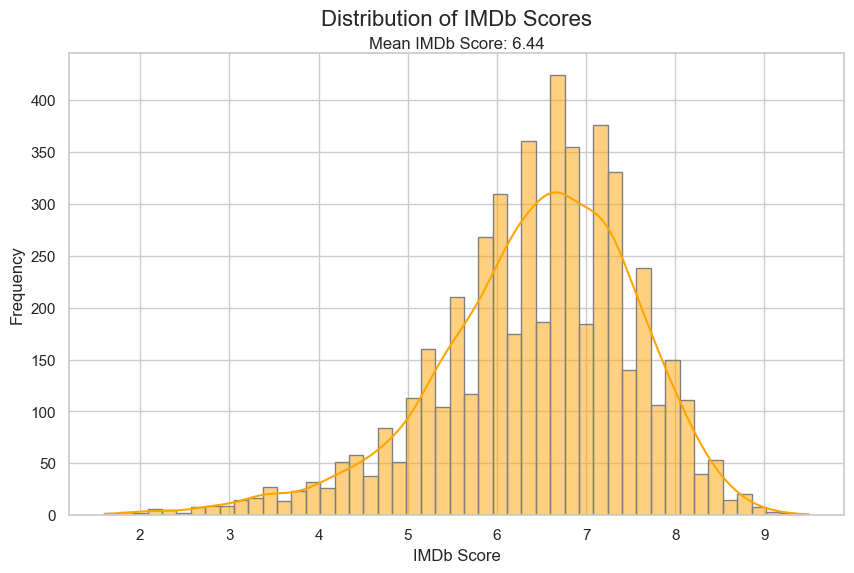

In [151]:
# Calculating the mean IMDb score
mean_imdb_score = movies['imdb_score'].mean()

# Creating the plot
plt.figure(figsize=(10, 6))

# Plotting the histogram
sns.histplot(movies['imdb_score'], kde=True, color='orange', edgecolor='grey')

# Adding title, subtitle, and labels
plt.title('Distribution of IMDb Scores', fontsize=16, pad=20)
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.text(0.5, 1.02, f'Mean IMDb Score: {mean_imdb_score:.2f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.show()

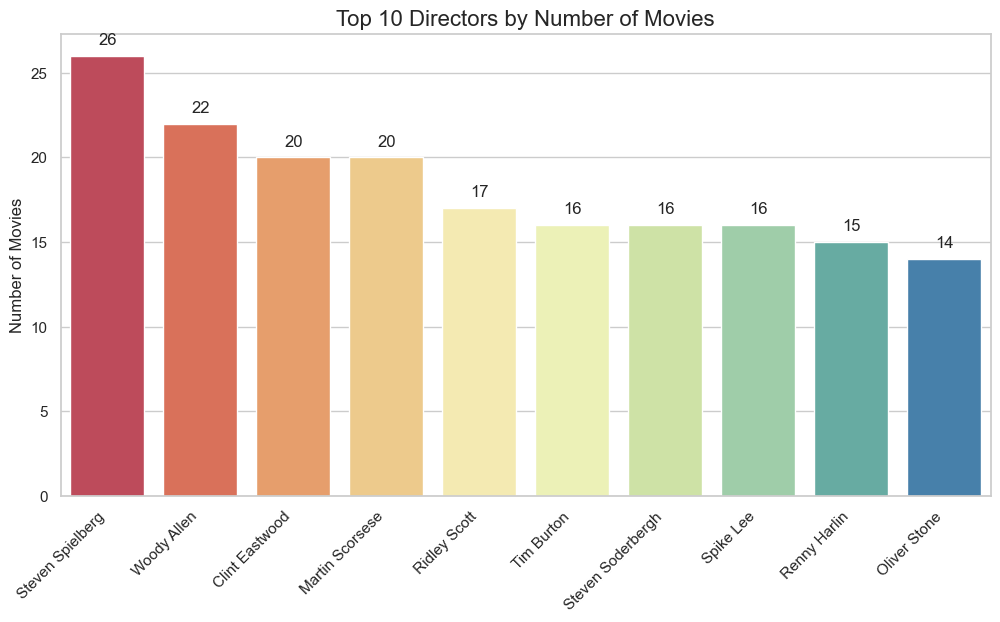

In [152]:
# Getting the top 10 directors by number of movies
top_directors = movies['director_name'].value_counts().head(10)

# Creating the plot
plt.figure(figsize=(12, 6))

# Color pallette
color_palette = sns.color_palette("Spectral", len(top_directors))

# Plot the barplot
sns.barplot(x=top_directors.index, y=top_directors.values, palette=color_palette)

# Adding title and labels
plt.title('Top 10 Directors by Number of Movies', fontsize=16)
plt.xlabel('')
plt.ylabel('Number of Movies', fontsize=12)

# Rotating x-ticks
plt.xticks(rotation=45, ha='right')

# Adding labels to each bar
for i, value in enumerate(top_directors.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.show()

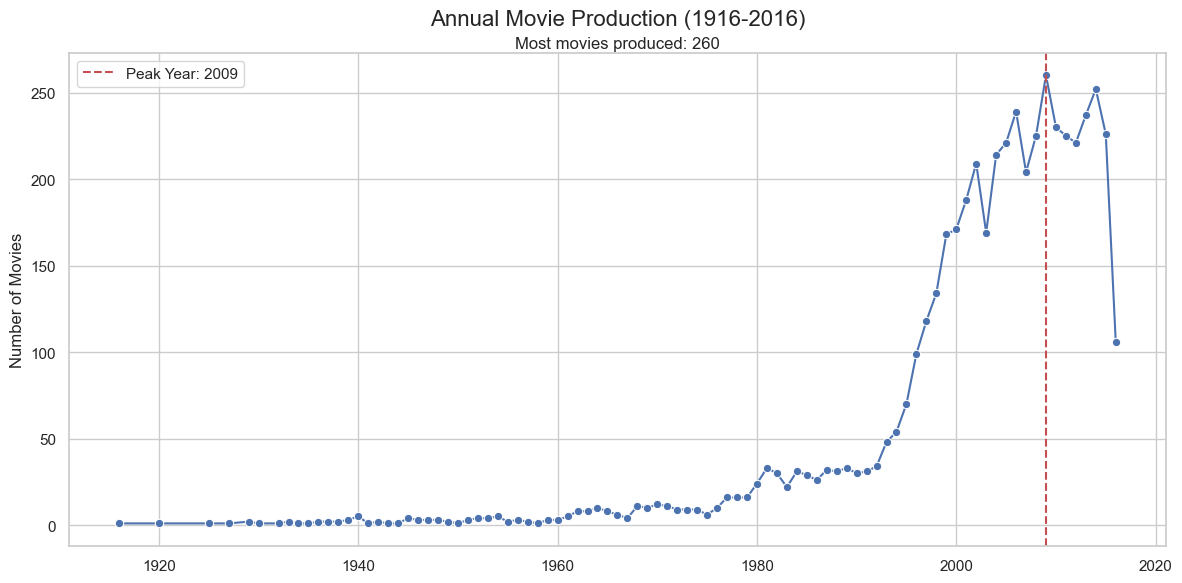

In [154]:
annual_movies = movies.groupby('title_year')['movie_title'].count()

# Finding the year with the highest number of movies
peak_year = annual_movies.idxmax()
peak_value = annual_movies.max()

# Creating the plot
plt.figure(figsize=(12, 6))

# Plotting the line
sns.lineplot(x=annual_movies.index, y=annual_movies.values, marker='o', color='b')

# Adding a vertical line for the peak year
plt.axvline(x=peak_year, linestyle='--', color='r', label=f'Peak Year: {int(peak_year)}')

# Adding title, subtitle, and labels
plt.title('Annual Movie Production (1916-2016)', fontsize=16, pad=20)
plt.xlabel('')
plt.ylabel('Number of Movies', fontsize=12)
plt.text(0.5, 1.02, f'Most movies produced: {peak_value}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

# Adding legend
plt.legend()

plt.tight_layout()
plt.show()

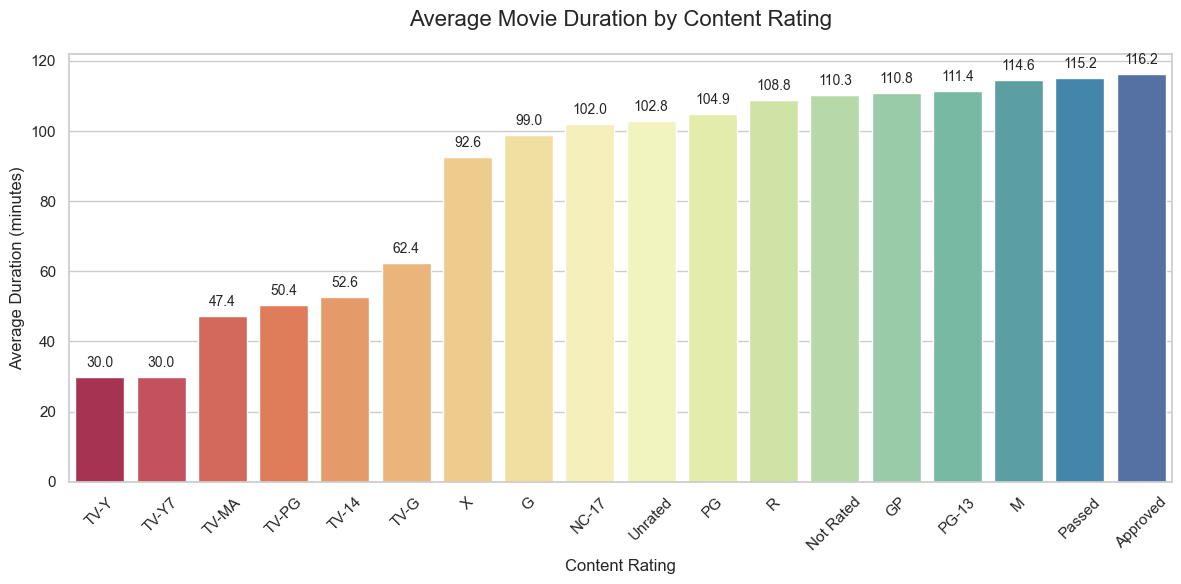

In [155]:
# Calculating the average movie duration by content rating
avg_duration = movies.groupby('content_rating')['duration'].mean().sort_values()

# Creating the plot
plt.figure(figsize=(12, 6))

# Creating barplot
sns.barplot(x=avg_duration.index, y=avg_duration.values, palette='Spectral')

# Adding title and labels
plt.title('Average Movie Duration by Content Rating', fontsize=16, pad=20)
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('Average Duration (minutes)', fontsize=12)
plt.xticks(rotation=45)

# Adding labels on top of each bar
for i, value in enumerate(avg_duration.values):
    plt.text(i, value + 2, f'{value:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()